# Prosper Loan Data Findings
## by Mariam Joan

## Preliminary Wrangling

_Hello! Welcome to this loan dataset and analysis! Let's dig into the Prosper Loans data to see the types of loans being taken out and the types of borrowers that are requesting such loans!_

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from matplotlib import colors
from matplotlib.pyplot import figure, show
from matplotlib.ticker import PercentFormatter
from seaborn import countplot

%matplotlib inline

In [97]:
prosper = pd.read_csv('prosperLoanData.csv')

In [98]:
# create copy of our df
prosper_clean = prosper.copy()

In [99]:
# get number of rows, cols
prosper.shape

(113937, 81)

### Let's get an overview of our data with basic info(), describe() and dtype functions

In [100]:
# prosper.info()

In [101]:
prosper.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [102]:
# prosper.dtypes

In [103]:
prosper.head(1)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258


### Let's use fillna() to fill in any missing values

In [104]:
prosper_clean.fillna(0, inplace=True)

### With so many columns, let's have a look at which might be categorical by taking our columns array, and using the _get_numeric_data() function on that array, then subtract that length from the entire dataset and store it in a list

In [105]:
cols = prosper_clean.columns # cite 1
num_cols = prosper_clean._get_numeric_data().columns
list(set(cols) - set(num_cols))

['BorrowerState',
 'DateCreditPulled',
 'GroupKey',
 'EmploymentStatus',
 'FirstRecordedCreditLine',
 'MemberKey',
 'IncomeRange',
 'CreditGrade',
 'ListingCreationDate',
 'LoanOriginationQuarter',
 'Occupation',
 'ProsperRating (Alpha)',
 'ListingKey',
 'LoanStatus',
 'LoanKey',
 'ClosedDate',
 'LoanOriginationDate']

### Here we will confirm which columns we don't need for this analysis and can safely drop using the drop() method

In [106]:
prosper_clean.drop(columns=['DelinquenciesLast7Years','RevolvingCreditBalance','BankcardUtilization',
                            'TradesOpenedLast6Months','IncomeVerifiable','TotalProsperPaymentsBilled',
                            'LoanFirstDefaultedCycleNumber','LoanNumber','ProsperRating (numeric)',
                            'ProsperRating (Alpha)','LoanKey','ListingKey','LenderYield',
                            'EstimatedEffectiveYield','CurrentlyInGroup','GroupKey','FirstRecordedCreditLine',
                            'CurrentCreditLines','OpenCreditLines','TotalCreditLinespast7years',
                            'OpenRevolvingAccounts','OpenRevolvingMonthlyPayment','InquiriesLast6Months',
                            'TotalInquiries','PublicRecordsLast10Years','PublicRecordsLast12Months','TotalTrades',
                            'LoanOriginationQuarter','LP_CustomerPayments','LP_CustomerPrincipalPayments',
                            'LP_InterestandFees','LP_ServiceFees','LP_CollectionFees','LP_GrossPrincipalLoss',
                            'LP_NetPrincipalLoss','LP_NonPrincipalRecoverypayments', 'LP_CustomerPrincipalPayments', 
                            'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 
                            'LP_NetPrincipalLoss','LP_NonPrincipalRecoverypayments'], axis=1, inplace=True)

### Renaming this column header because of the parenthesis as it will be easier to query

In [107]:
prosper_clean = prosper_clean.rename(columns={"ListingCategory (numeric)": "ListingCategory"})

### We have many categorical columns and need to make sure we set them to a data type of category, let's get all of these columns into a dictionary format to iterate over and set with pd.api.types.CategoricalDtype()

In [108]:
ordinal_var_dict = {
            'Occupation': ['Other', 'Professional', 'Skilled Labor', 'Executive',
               'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
               'Waiter/Waitress', 'Construction', 'Computer Programmer',
               'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
               'Military Enlisted', 'Clerical', 'Teacher', 'Clergy',
               'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
               "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
               'Nurse (LPN)', 'Military Officer', 'Food Service Management',
               'Truck Driver', 'Administrative Assistant',
               'Police Officer/Correction Officer', 'Social Worker',
               'Tradesman - Mechanic', 'Medical Technician', 'Professor',
               'Postal Service', 'Civil Service', 'Pharmacist',
               'Tradesman - Electrician', 'Scientist', 'Dentist',
               'Engineer - Electrical', 'Architect', 'Landscaping',
               'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
               'Engineer - Chemical', 'Doctor', 'Chemist',
               'Student - College Senior', 'Principal', "Teacher's Aide",
               'Pilot - Private/Commercial', 'Religious', 'Homemaker',
               'Student - College Graduate Student', 'Student - Technical School',
               'Psychologist', 'Biologist', 'Student - College Sophomore',
               'Judge', 'Student - College Junior', 'Car Dealer',
               'Student - Community College', 'Student - College Freshman'],
            'ListingCategory': [0, 2, 16, 1, 7, 13, 6, 15, 20, 19, 3, 18, 8, 
                4, 11, 14, 5, 9, 17, 10, 12],
            'CreditGrade':['C', 'HR', 'AA', 'D', 'B', 'E', 'A', 'NC'],
            'LoanStatus': ['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
               'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
               'Past Due (61-90 days)', 'Past Due (31-60 days)',
               'Past Due (91-120 days)', 'FinalPaymentInProgress',
               'Past Due (>120 days)'], 
            'BorrowerState': ['CO', 'GA', 'MN', 'NM', 'KS', 'CA', 'IL', 'MD', 'AL', 'AZ',
               'VA', 'FL', 'PA', 'OR', 'MI', 'NY', 'LA', 'WI', 'OH', 'NC', 'WA',
               'NV', 'NJ', 'TX', 'AR', 'SC', 'DE', 'MO', 'NE', 'UT', 'DC', 'MA',
               'CT', 'IN', 'KY', 'OK', 'MS', 'WV', 'RI', 'TN', 'ID', 'MT', 'HI',
               'NH', 'VT', 'WY', 'ME', 'AK', 'IA', 'SD', 'ND'],
            'EmploymentStatus':['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other',
                 'Not employed', 'Part-time', 'Retired'],
            'IncomeRange':['$25,000-49,999', '$50,000-74,999', 'Not displayed', '$100,000+',
               '$75,000-99,999', '$1-24,999', 'Not employed', '$0']}
    
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,categories = ordinal_var_dict[var])
    prosper_clean[var] = prosper_clean[var].astype(ordered_var)

### Here we are testing that our above function worked, and it does

In [109]:
prosper_clean.select_dtypes(include=['category'])

,CreditGrade,LoanStatus,ListingCategory,BorrowerState,Occupation,EmploymentStatus,IncomeRange
0,C,Completed,0,CO,Other,Self-employed,"$25,000-49,999"
1,NaN,Current,2,CO,Professional,Employed,"$50,000-74,999"
2,HR,Completed,0,GA,Other,Not available,Not displayed
3,NaN,Current,16,GA,Skilled Labor,Employed,"$25,000-49,999"
4,NaN,Current,2,MN,Executive,Employed,"$100,000+"
5,NaN,Current,1,NM,Professional,Employed,"$100,000+"
6,NaN,Current,1,KS,Sales - Retail,Employed,"$25,000-49,999"
7,NaN,Current,2,CA,Laborer,Employed,"$25,000-49,999"
8,NaN,Current,7,IL,Food Service,Employed,"$25,000-49,999"
9,NaN,Current,7,IL,Food Service,Employed,"$25,000-49,999"


### Let's convert all time series like columns to pandas datetime for use later on

In [110]:
prosper_clean['DateCreditPulled'] = pd.to_datetime(prosper_clean['DateCreditPulled'])
prosper_clean['LoanOriginationDate'] = pd.to_datetime(prosper_clean['LoanOriginationDate'])  
prosper_clean['ListingCreationDate'] = pd.to_datetime(prosper_clean['ListingCreationDate'])  

In [111]:
# using lambda to apply the strftime method and allow for our timestamps to say either "AM" or "PM"
prosper_clean['DateCreditPulled'] = prosper_clean['DateCreditPulled'].map(lambda x: x.strftime('%Y%m%d%' + ' ' + '%I:%M %p') if x else "")
prosper_clean['ListingCreationDate'] = prosper_clean['ListingCreationDate'].map(lambda x: x.strftime('%Y%m%d%' + ' ' + '%I:%M %p') if x else "")

### What is the structure of your dataset?

> The Prosper Loans consists of 82 attributes with 113066 unique listings. I've decided to focus on 42 important features which include loan member characteristics and what might be driving factors of estimated repayment verses loss. These variables differ from numeric to categorical. You can explore all variable definitions [here](https://docs.google.com/spreadsheets/d/1VtTHJgXz_oY8RRVGPKwFeYtN1BR23ZZMLJMqj_DaccQ/edit#gid=0).

### What is/are the main feature(s) of interest in your dataset?

> The main features of this dataset will be user defined characteristics such as, state of residence, monthly income, credit rating, employment status, delinquent payments, borrower rate, occupation, loan status, among others to learn more about the Prosper Loan Borrower. This will help with determining not only the risk of the borrower but, also potentially their ability and willingness to pay off the loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think the monthly income, debt to income ratio, monthly loan payments, employment status, occupation, credit score ranges, and borrower state along with borrower rate and APR will be a great determiner in learning if our users will be able to payoff their loans.

## Univariate Exploration

### Let's look at Borrower Occupation to see any patterns or determine if there is more interest for loans in particular fields. This can help with Prosper Loan marketing teams and their efforts in marketing strategies. 

> ### We see the top occupation is Other which doesn't supply much information however, the Professional is next, which can mean many things like management positions, or even a professional althlete, while Computer Programmer is third with Executive, and Teacher behind. Overall, we have education, technology, professionals and other, with some ambiguity, in the top 5.

In [112]:
# value counts on occupation and then sort descending the countplot on the y axis
occupation_count = prosper_clean.Occupation.value_counts().sort_values(ascending=False).index

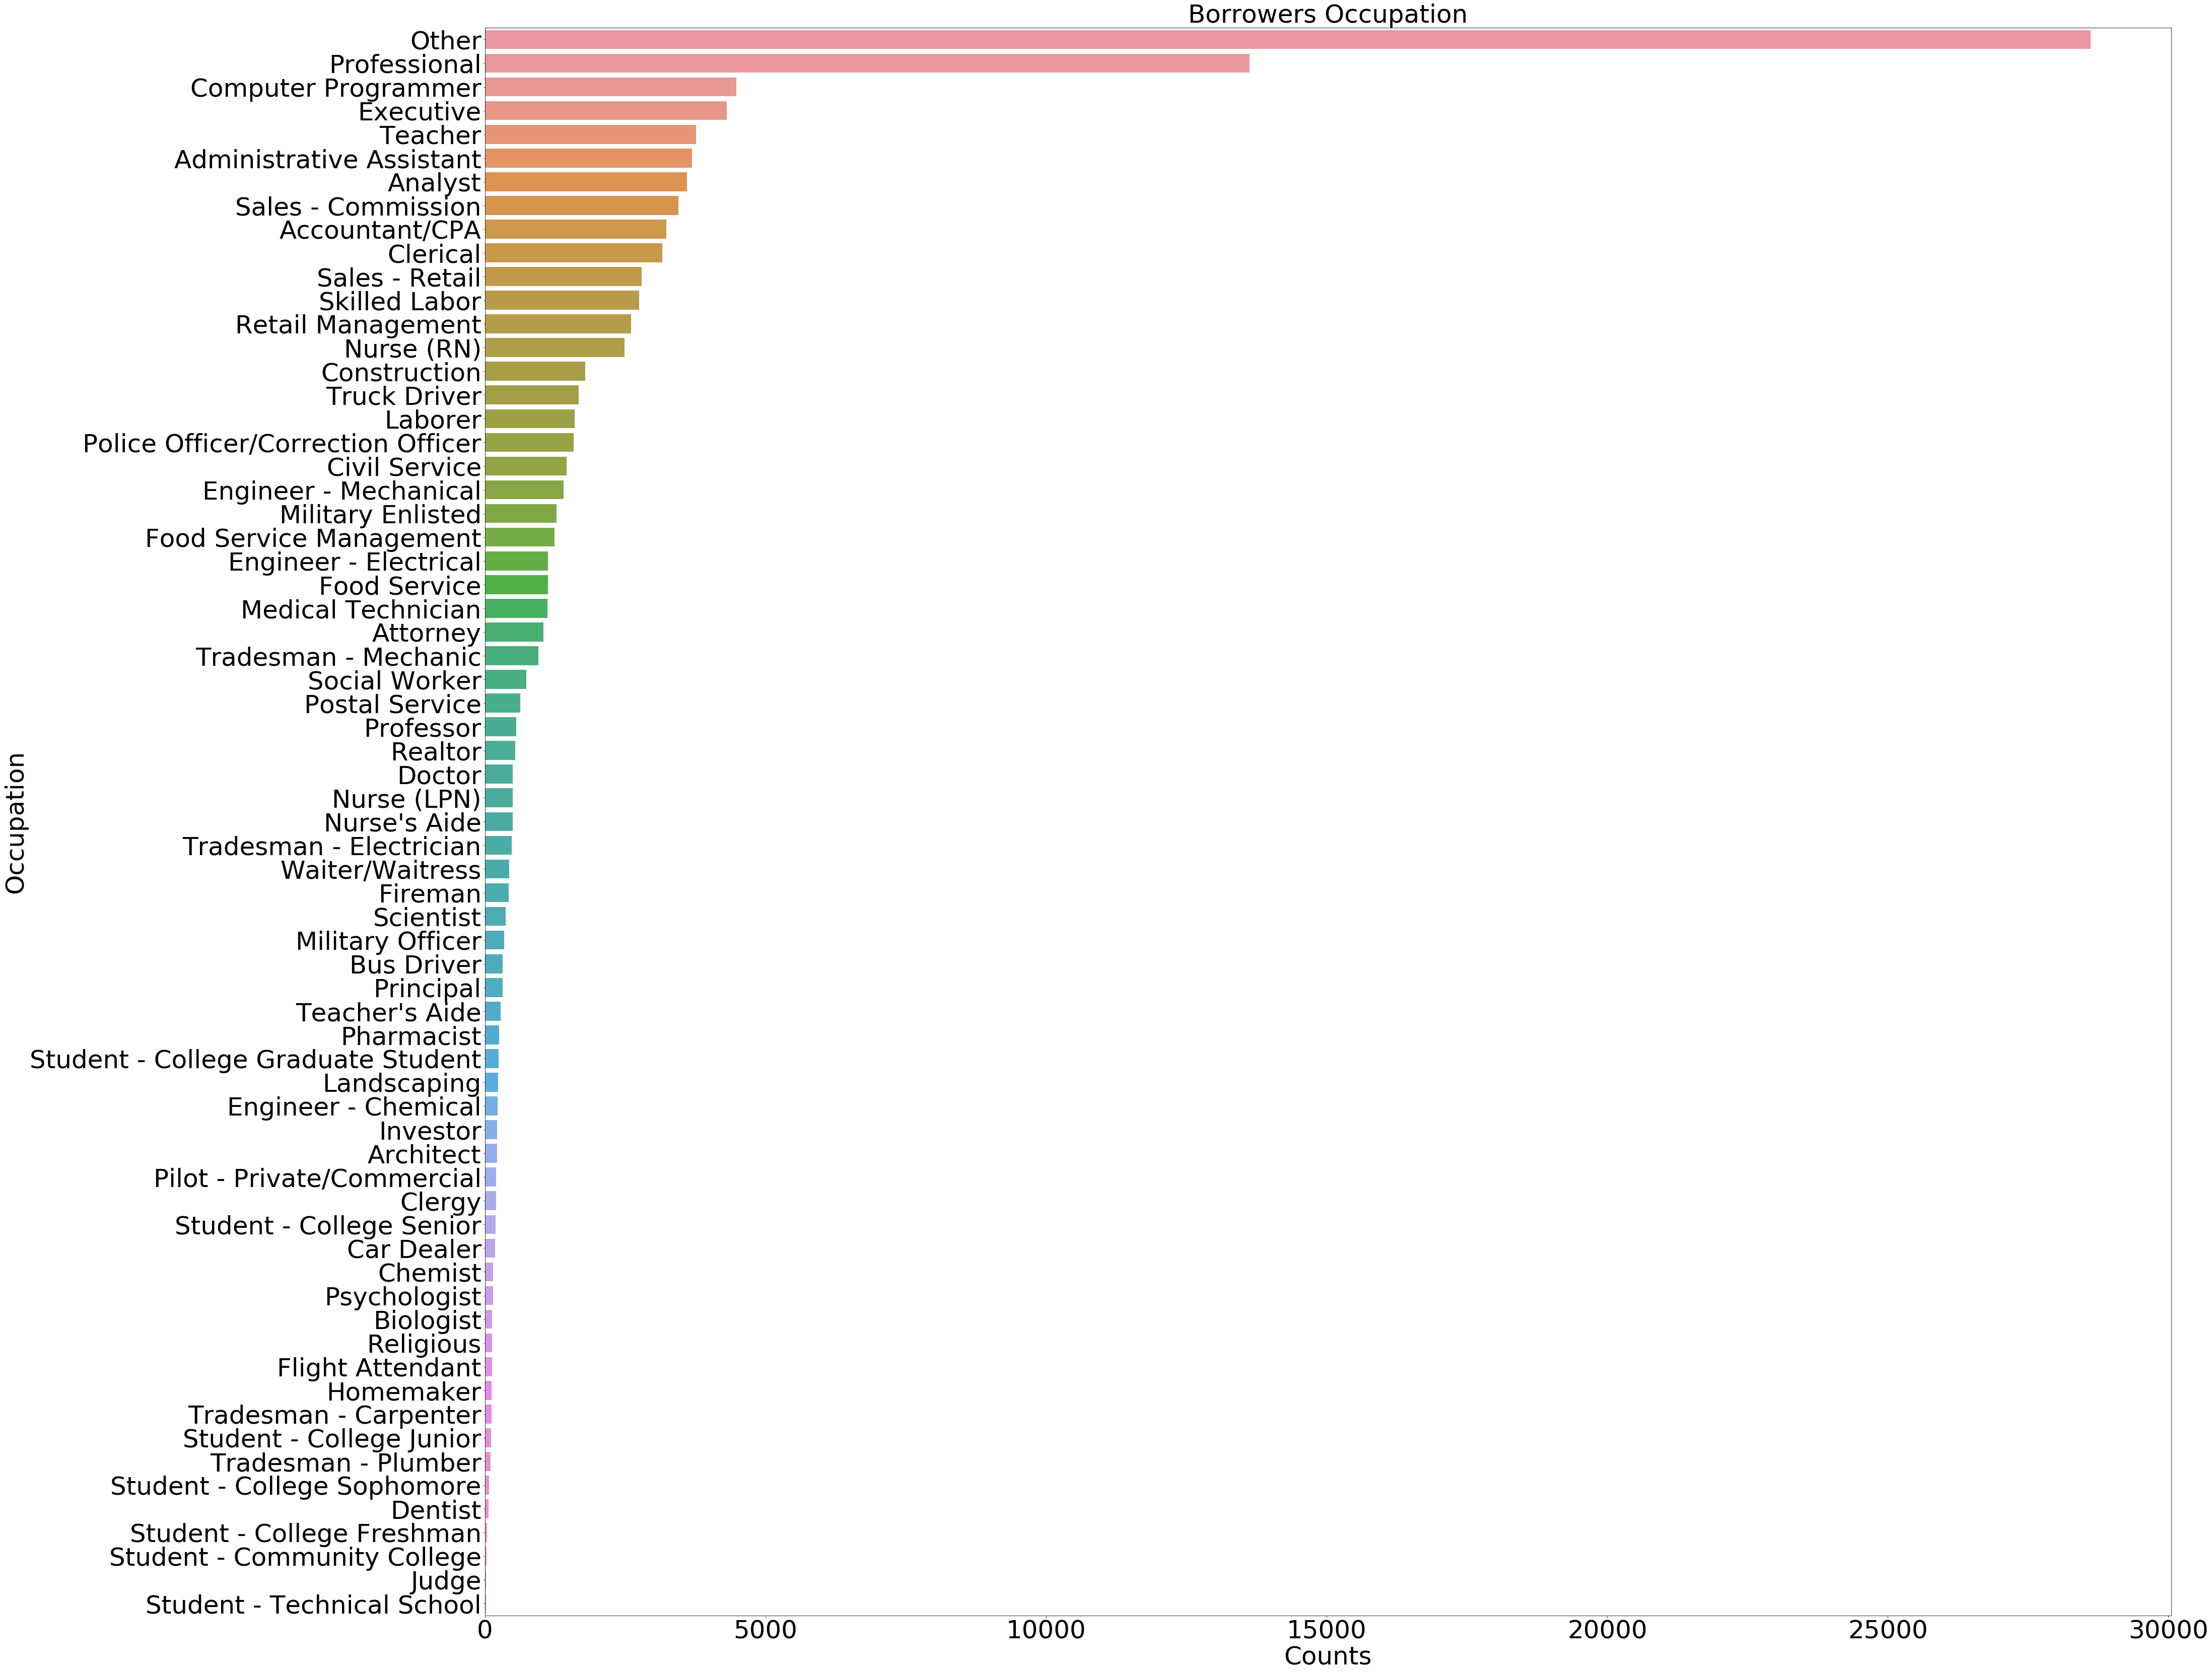

In [113]:
plt.figure(figsize=[60, 58])

ax = sb.countplot(y="Occupation", data=prosper_clean, order =occupation_count)
ax.tick_params(labelsize=50)
plt.title('Borrower''s Occupation', fontsize=50)
plt.xlabel('Counts', fontsize=50)
plt.ylabel('Occupation', fontsize=50);
plt.show()

### Let's now look at our Borrower Rate, here we can see this is not exactly a normal distribution but, can be interpreted more as random skewness with different peaks with slight right skewness with peak at 0.15%, a mean of 0.19%, and then a peak again after 0.20% but, a drop around the 4000 frequency range with a random spike at ~0.32%. We can generalize and say that borrower's can receive anywhere between 0.05% and 0.30% for their loan interest rate with further investigation required on the spike at ~0.32%

In [114]:
# mean and standard deviation 
prosper_clean['BorrowerRate'].mean(), prosper_clean['BorrowerRate'].std()

(0.1927640577687518, 0.07481843026322685)

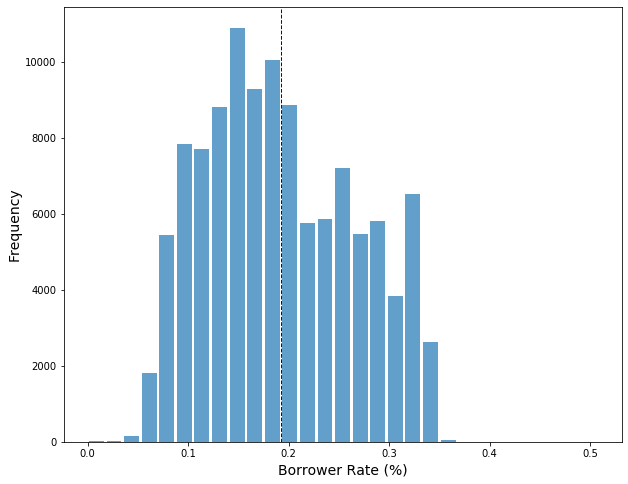

In [115]:
# calcluate bins, and use the hist function with styling and a mean line
bins = np.arange(0, prosper_clean['BorrowerRate'].max()+0.0175,0.0175)

x = prosper_clean['BorrowerRate']

plt.figure(figsize=[10,8])
plt.hist(x, bins=bins, alpha=0.7, rwidth=0.85)

plt.axvline(x.mean(), color='#0504aa', linestyle='dashed', linewidth=1)  # cite 3
plt.xlabel('Borrower Rate (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14);

### With Borrower APR we can see a similar pattern of random skewnness and a peak at ~0.18% and ~0.21%, while our mean of ~0.22% then seems to drop to about a 2700 frequency range but, thene rise slightly again just before 0.30% with a random peak again at ~0.36%. We can generalize and say that the borrower's APR can receive anywhere between 0.13% and 0.25% with 0.22% on average while further investigation should be noted for the spike at ~0.36%

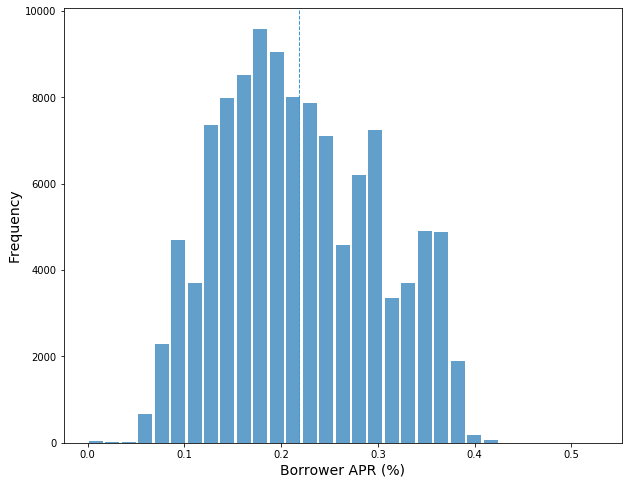

In [116]:
# calculate the bins, with hist function, styling and mean line
bins = np.arange(0, prosper_clean['BorrowerAPR'].max()+0.017,0.017)

x = prosper_clean['BorrowerAPR']

plt.figure(figsize=[10,8])
plt.hist(x, bins=bins, alpha=0.7, rwidth=0.85)

plt.axvline(x.mean(), color='#3498db', linestyle='dashed', linewidth=1) 
plt.xlabel('Borrower APR (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14);

### Viewing Estimated Return we see there is a spike at 0.01% tand somewhat of a right skewed distribution with a peak at about ~0.9% which shows estimated rate of returns with Prosper Loans are mostly within this range of 0.05% and 0.15%, while further investigation is required on the spike.

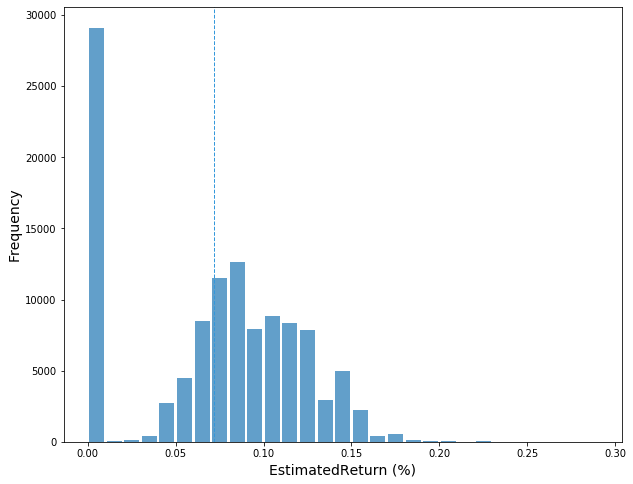

In [117]:
# calculate the bins, get hist function, with styling and mean line
bins = np.arange(0, prosper_clean['EstimatedReturn'].max()+0.01,0.01)

x = prosper_clean['EstimatedReturn']

plt.figure(figsize=[10,8])
plt.hist(x, bins=bins, alpha=0.7, rwidth=0.85)

plt.axvline(x.mean(), color='#3498db', linestyle='dashed', linewidth=1) 
plt.xlabel('EstimatedReturn (%)', fontsize=14)
plt.ylabel('Frequency', fontsize=14);

### Let's plot only Amount Delinquent values over 0.0 and put them in a numpy array which we can pass into our kdeplot to show frequencies of these amounts.

> ### Results show we have a wide range of amounts delinquent from 3 to over 16435 dollars owed

In [27]:
# query delinquent values over 0.0 and store that to a variable
amount_delinquent = np.array(prosper_clean.query('AmountDelinquent > 0.0').nunique())
amount_delinquent

array([16435, 16350,     7,     3,    11,  2244,  2526,  1234,   116,
         735,    12,    21,    51,    66,     7,   501,     2, 16347,
          17,    17,    41,  7058,  7524,    97,   174,     8,  3114,
           8,   104,    28,    11,   448,  2494,   301,  1820,    78,
         621,  1513, 14435,  7099,   157,     9,     6,   199,   455])

Text(0, 0.5, 'Frequency')

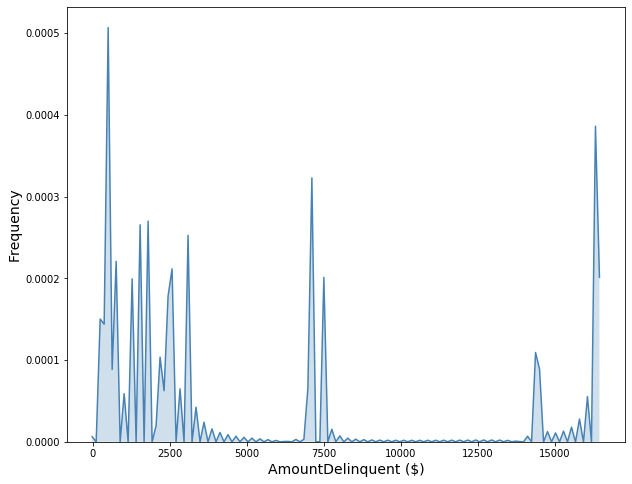

In [28]:
# use kdeplot with styling 
plt.figure(figsize=[10,8])
sb.kdeplot(amount_delinquent, shade=True, color='steelblue', bw=5);
plt.xlabel('AmountDelinquent ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

### Let's look now at the entiretly of Amount Delinquent using all values from our column and use it with kdeplot to view frequencies

> ### Here we can clearly see an uneven distribution

Text(0, 0.5, 'Frequency')

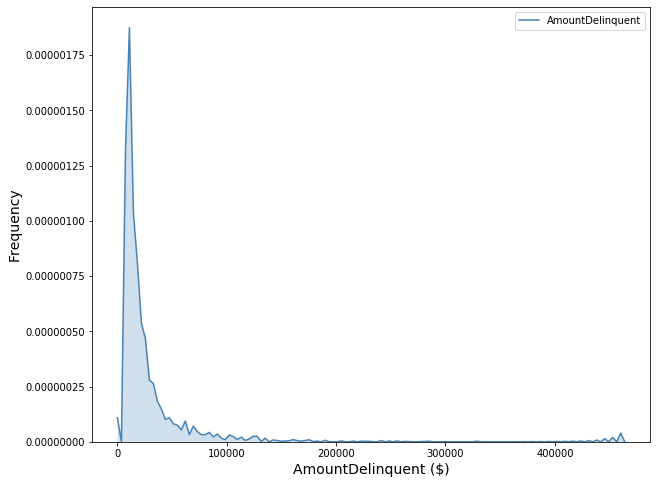

In [29]:
# kdeplot with styling
plt.figure(figsize=[10,8])
sb.kdeplot(prosper_clean['AmountDelinquent'], shade=True, color='steelblue', bw=5);
plt.xlabel('AmountDelinquent ($)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

### The skewed bar chart above means we can try for a log scale instead for a normal distribution

In [ ]:
x = prosper_clean['AmountDelinquent']

bins = 10 ** np.arange(0, x.max()+2, 2)

plt.figure(figsize=[10, 8])
plt.hist(x, bins=bins, alpha=0.7,  color='steelblue')
plt.xscale('log')
plt.xlabel('AmountDelinquent ($) Log Scale', fontsize=14)

### Let's look at our Credit Grade frequency across the dataset with a countplot, here we can see most credit grades are grade "C", with grade "D", and "B" as second and third. 

> ### from our legend we know grade C is 630 to 679 which is on the higher risk side, while AA is a leading credit grade with little risk at number 4 in this order

In [30]:
# get shape of credit grade data
total_credit_shape = float(prosper_clean.CreditGrade.shape[0])

In [31]:
# use value counts to get counts of all credit grade types 
# then sort these counts descending by index
descending_order_grade = prosper_clean['CreditGrade'].value_counts().sort_values(ascending=False).index

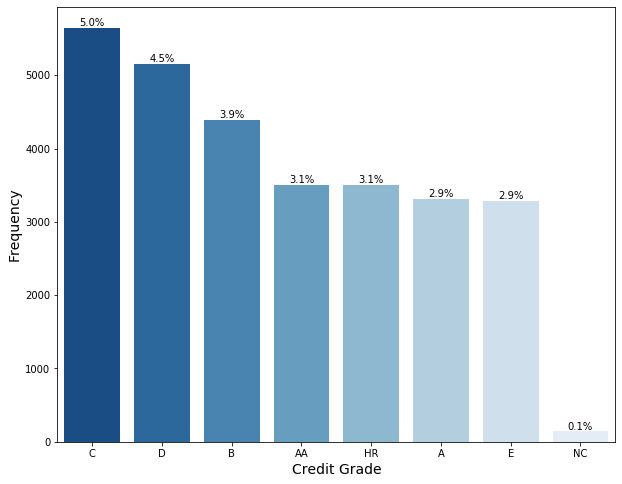

In [32]:
# use countplot with order descending, and a reversed color palette
# iterate over ax.patches in order to get the percentages on top of our countplot bars
plt.figure(figsize=[10, 8])

ax = sb.countplot(x="CreditGrade", data=prosper_clean, order=descending_order_grade, palette="Blues_r")

for p in ax.patches:  # cite 2
    x=p.get_bbox().get_points()[:,0]  
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/total_credit_shape), (x.mean(), y), ha='center', va='bottom') 

letter_labels = ['C: 630-679','D: 550-629','B: 680-719','AA: 760+ ',
                 'HR: First Time Borrower', 'A: 720+','E: 520-','NC: No Credit']

plt.xlabel('Credit Grade', fontsize=14)
plt.ylabel('Frequency', fontsize=14);

### Here we use a countplot to view Loan Status of all Borrowers which shows very positively that 49.7% of loans are in current status, which ideally is great for a loan company! With ~10% charged off and ~4% defaulted are not as good but, yet relatively low numbers and we see no Borrowers are > 120 days overdue on their loans which looks promising! 

In [33]:
# get shape of loan status data
total_loan_status = float(prosper_clean.LoanStatus.shape[0])

In [34]:
descending_order = prosper_clean['LoanStatus'].value_counts().sort_values(ascending=False).index

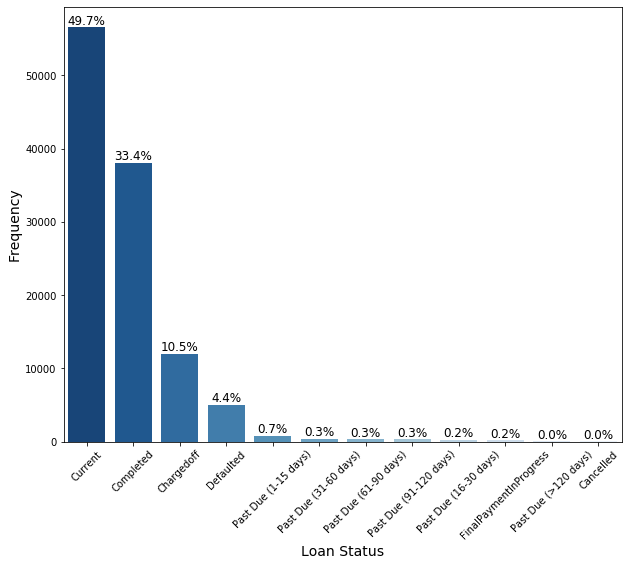

In [35]:
# use countplot with styling with order descending and reversed color palette
# then iterate over ax.patches to put the percentage of each bar at the top of the bar
f, ax = plt.subplots(figsize=(10, 8))

ax = sb.countplot(x="LoanStatus", data=prosper_clean, 
                  order=descending_order, palette="Blues_r")

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]  # cite 2
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/total_loan_status), (x.mean(), y), 
            ha='center', va='bottom',  fontsize=12) 
    
ax.set_ylabel('Frequency [%]')
plt.setp(ax.get_xticklabels(), rotation=45);
plt.xlabel('Loan Status', fontsize=14)
plt.ylabel('Frequency', fontsize=14);

### The Prosper Score ranges from 1-10, with 10 being the best and lowest risk score. Using seaborn's distplot we can see the majority of Borrower's have a 1 which is the riskiest, while on average the mean shows Borrower's have about a 4. 

In [36]:
# get prosper score mean
prosper_clean.ProsperScore.mean()

4.431229539131274

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


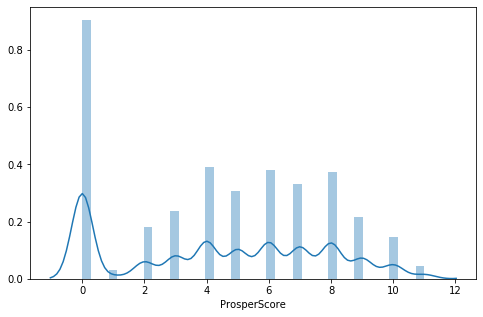

In [37]:
# use distplot to get quick view of prosper score data ranges
plt.figure(figsize=[8, 5])
sb.distplot(prosper_clean.ProsperScore);

### The Debt to Income Ratio numbers look low

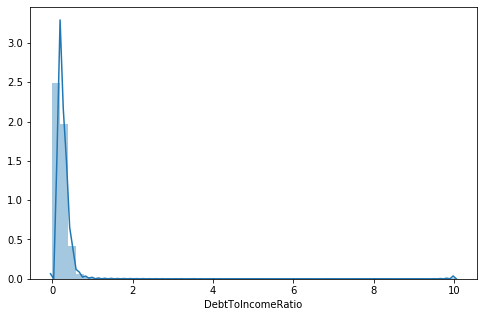

In [38]:
# use distplot to get quick overview of debt to income ratio
plt.figure(figsize=[8,5])
sb.distplot(prosper_clean.DebtToIncomeRatio, kde=True, rug=False);

### Monthly Loan Payments appear to be mostly < 500 dollars but, can be upwards of 2000 while on average payments are at 272

In [39]:
# mean of monthly loan payments
prosper_clean.MonthlyLoanPayment.mean()

272.47578310823104

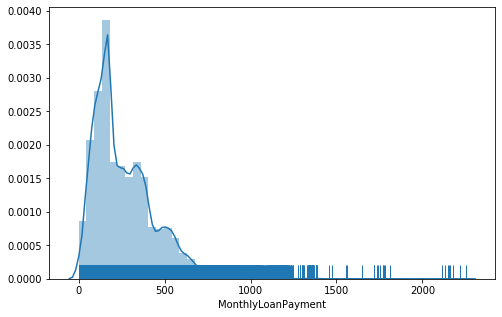

In [40]:
# use displot to view monthly loan payment 
plt.figure(figsize=[8,5])
sb.distplot(prosper_clean.MonthlyLoanPayment, kde=True, rug=True);

### The Loan Origination Amount shows a wide range of loans between 1000 to 35000 with a mean of 8337

In [41]:
# get mean of loan original amount
prosper_clean.LoanOriginalAmount.mean()

8337.013849759078

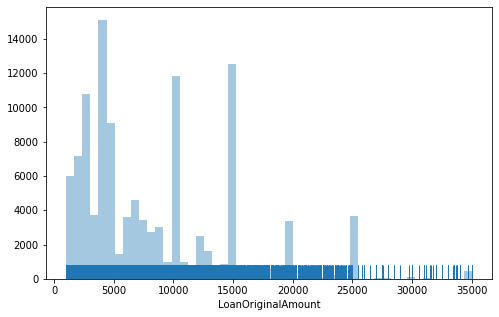

In [42]:
# use distplot to get overview of loan original amounts
plt.figure(figsize=[8,5])
sb.distplot(prosper_clean.LoanOriginalAmount, kde=False, rug=True);

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distplots gave a quick look at some key variables which help with determining whether the borrower will be able to payoff their loan. The Amount Delinquent required a log scale transformation while Estimated Return, and Borrower's Rate, and APR showed more random distribution with some spikes.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, the Amount Delinquent had very low values which made it difficult to chart and required a log scale.

## Bivariate Exploration

### Let's look at the relationship between Borrower's who have Prosper Loans principles outstanding and compare it with their employment status duration to see if there is any correlation. Looking at the mean of each variable we see Borrower's have been employed on average of about 89 days, with on average 568 dollars outstanding

In [43]:
# get mean of employment status duration and prosper principal outstanding
prosper_clean.EmploymentStatusDuration.mean(), prosper_clean.ProsperPrincipalOutstanding.mean()

(89.6421882268271, 567.99795158728)

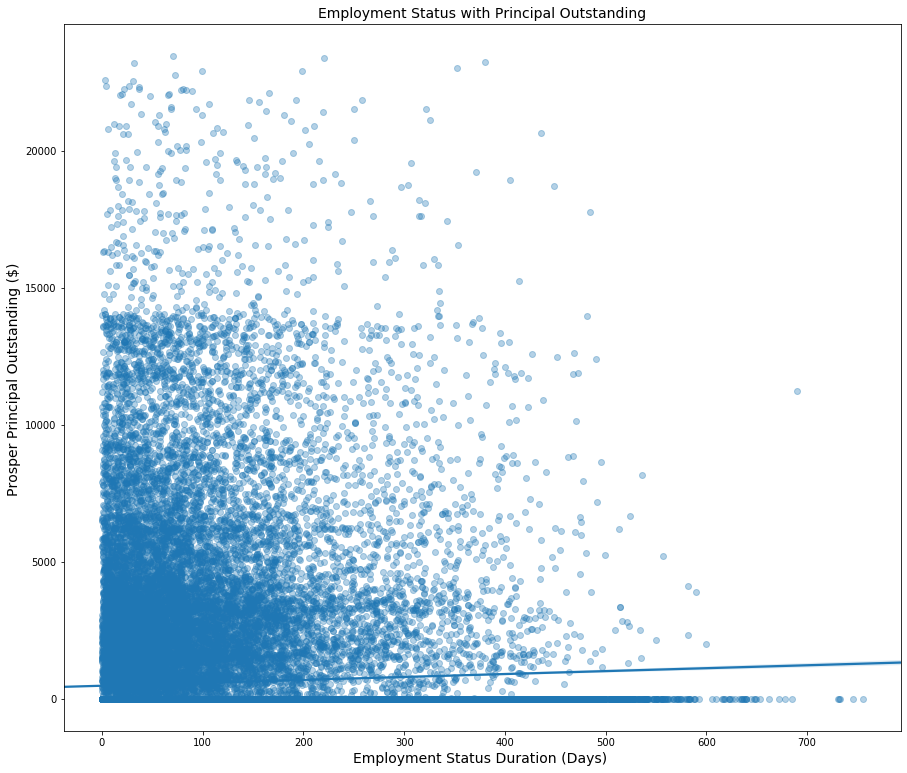

In [44]:
# use regplot with styling and jitter because plots were too dense 
plt.figure(figsize=[15, 13])

sb.regplot(data = prosper_clean, x = 'EmploymentStatusDuration', y = 'ProsperPrincipalOutstanding', 
           fit_reg=True, x_jitter = 0.2, y_jitter = 0.2, scatter_kws = {'alpha' : 1/3})


ax.tick_params(labelsize=16)
plt.title('Employment Status with Principal Outstanding', fontsize=14)
plt.xlabel('Employment Status Duration (Days) ', fontsize=14)
plt.ylabel('Prosper Principal Outstanding ($) ', fontsize=14);

### Taking a different approach now, let's view the number of homeowners we have by state that have taken out Prosper Loans using seaborn's countplot.

In [45]:
# let's create a new df with these two variables, using groupby() 
# then reset index which will be our counts
# finally, create a pivot table 
home_owner_by_state = prosper_clean.groupby(['IsBorrowerHomeowner', 'BorrowerState']).size()
home_owner_by_state = home_owner_by_state.reset_index(name = 'count')
home_owner_by_state = home_owner_by_state.pivot(index = 'IsBorrowerHomeowner', columns = 'BorrowerState', values = 'count')

In [46]:
# let's view our new df
home_owner_by_state

BorrowerState,CO,GA,MN,NM,KS,CA,IL,MD,AL,AZ,...,MT,HI,NH,VT,WY,ME,AK,IA,SD,ND
IsBorrowerHomeowner,,,,,,,,,,,,,,,,,,,,,
False,944,2094,1016,215,468,8834,2978,1222,790,873,...,165,261,255,93,39,45,88,80,82,32
True,1266,2914,1302,257,594,5883,2943,1599,889,1028,...,165,148,296,114,111,56,112,106,107,20


In [68]:
# let's sort based on row values using axis=1
home_owner_by_state.sort_values(by=1, ascending=False, axis=1, inplace=True)
home_owner_by_state

BorrowerState,CA,TX,FL,IL,GA,OH,NY,MI,VA,NC,...,MT,DC,HI,VT,AK,WY,SD,IA,ME,ND
IsBorrowerHomeowner,,,,,,,,,,,,,,,,,,,,,
False,8834,2863,3340,2978,2094,1771,4332,1678,1375,1341,...,165,227,261,93,88,39,82,80,45,32
True,5883,3979,3380,2943,2914,2426,2397,1915,1903,1743,...,165,155,148,114,112,111,107,106,56,20


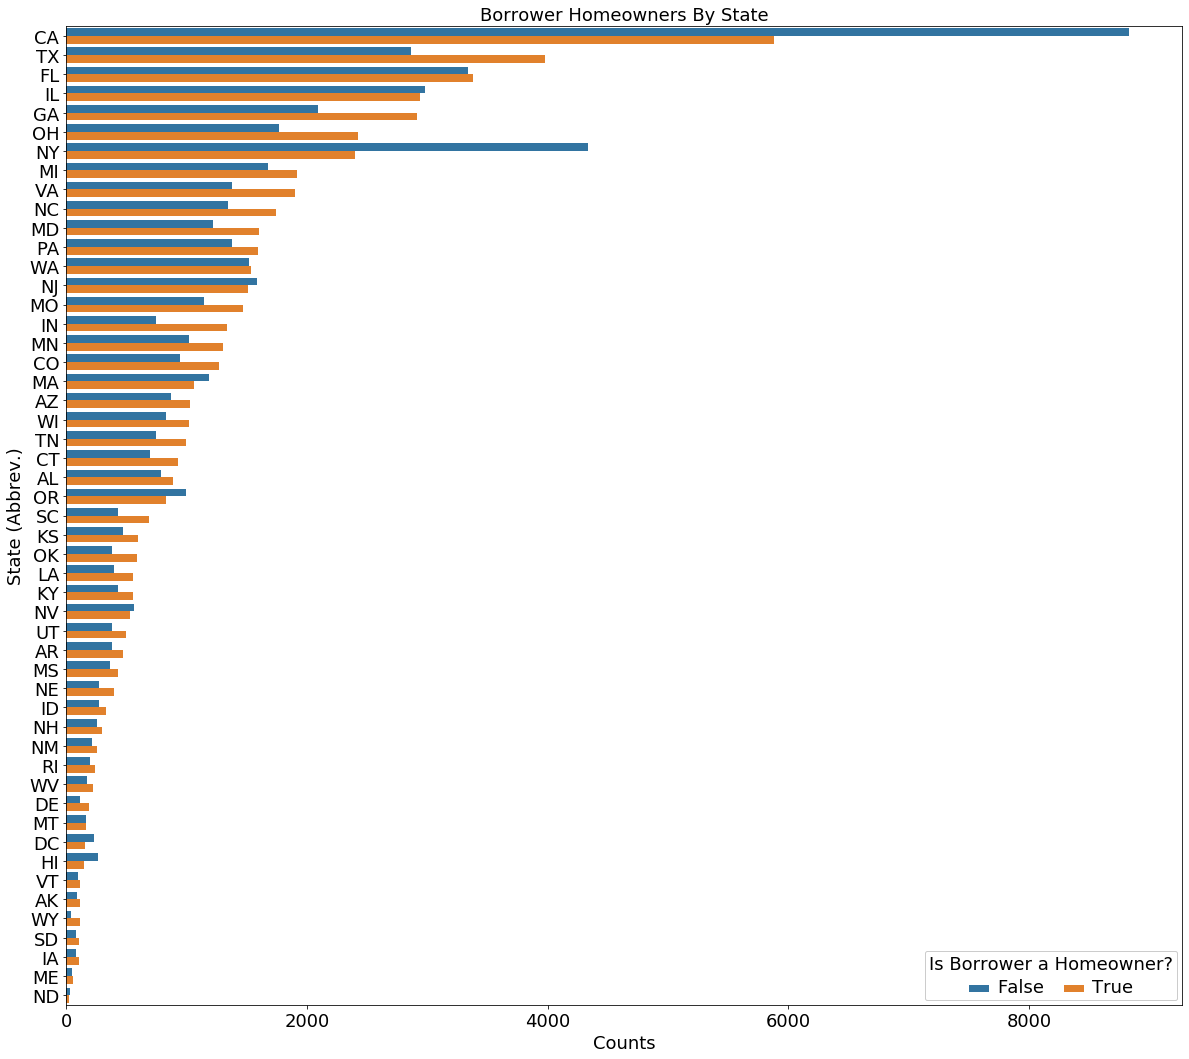

In [69]:
# using countplot and order descending, with increased figuresize and styling
plt.figure(figsize=[20, 18])

ax = sb.countplot(data = prosper_clean, y='BorrowerState', hue='IsBorrowerHomeowner',
                  order =home_owner_by_state)


ax.tick_params(labelsize=18)
ax.legend(loc = 0, ncol = 3, framealpha = 3, title = 'Is Borrower a Homeowner?')

plt.title('Borrower Homeowners By State', fontsize=18)
plt.xlabel('Counts', fontsize=18)
plt.ylabel('State (Abbrev.)', fontsize=18);

plt.setp(ax.get_legend().get_texts(), fontsize='18') 
plt.setp(ax.get_legend().get_title(), fontsize='18')

plt.show()

### Let's view Employment Status and how it is related to Monthly Loan Payments using seaborn's FacetGrid. Interestingly you can see payments are mostly from Borrower's who are employed while second ranked would be full time employed, then a cross between self-employed and not available.

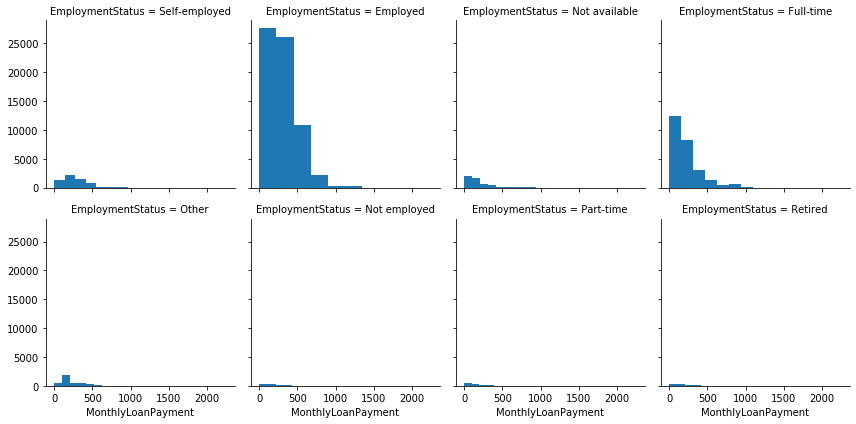

In [70]:
# use facetgrid with col as a categorical variable and map each grid with a hist graph and four columns
g = sb.FacetGrid(data = prosper_clean, col = 'EmploymentStatus', col_wrap = 4, height = 3)
g.map(plt.hist, "MonthlyLoanPayment");

### Let's look now at our Borrower Stated Income and Available Bankcard Credit to see if there are any patterns, outliers and or dense areas to look further into

> ### It seems our Borrowers have monthly incomes that are from 0 to less than 250,000, with upwards of 600,000 in bank credit while only 4 have less than 500,000 monthly income, 1 at about 650,000 and an outlier earning 1.75M of which have less than 100,000 in available bankcard credit. This number may not consider other banks the Borrower has relationships with but, overall this gives us a good snapshot of our Borrower's access to income/credit.

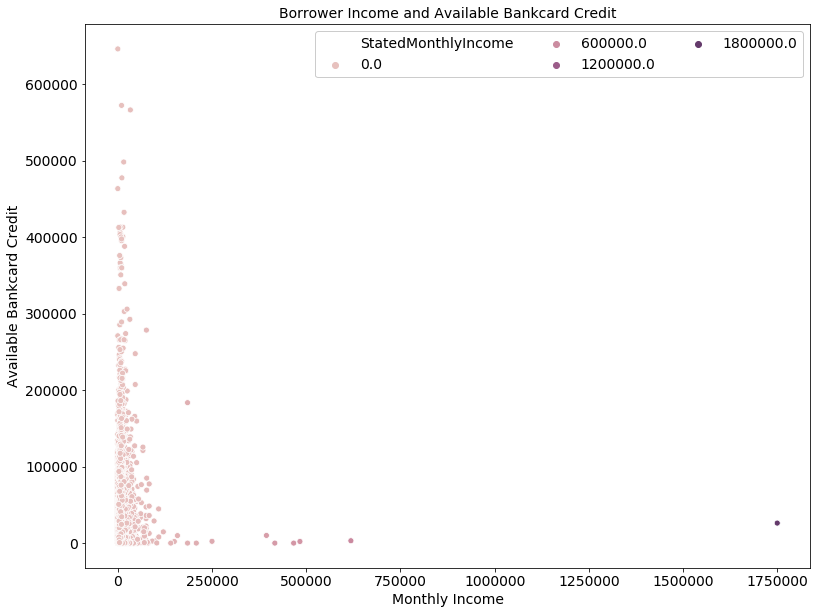

In [118]:
# use scatterplot with cmap to get our coloring in a continuous fashion
# use jitter to bring random noise into the density 
plt.figure(figsize=[13, 10])

cmap = sb.cubehelix_palette(dark=.3, light=.8, as_cmap=True)

ax = sb.scatterplot(x='StatedMonthlyIncome', y='AvailableBankcardCredit', 
                   hue="StatedMonthlyIncome", palette=cmap, 
                   x_jitter = 0.2, y_jitter = 0.2, data = prosper_clean)


ax.tick_params(labelsize=14) 
ax.legend(loc = 0, ncol = 3, framealpha = 3, fontsize=14)

plt.title('Borrower Income and Available Bankcard Credit', fontsize=14)
plt.xlabel('Monthly Income', fontsize=14)
plt.ylabel('Available Bankcard Credit', fontsize=14);
plt.show()

### Let's create a df to show only Loan Origination Date and Loan Original Amount then plot that df to see a time series and if there is any time of the year when Borrower's are requesting loans.

In [120]:
# get subset of two variables to a df
loan_origin_timeseries = prosper_clean[['LoanOriginalAmount', 'LoanOriginationDate']]

In [121]:
# convert date to datetimee and set it to our df index
pd.to_datetime(loan_origin_timeseries.LoanOriginationDate, errors="ignore")
loan_origin_timeseries.index = loan_origin_timeseries['LoanOriginationDate']

In [122]:
# delete our date column and look at our data
del loan_origin_timeseries['LoanOriginationDate']
loan_origin_timeseries.head()

,LoanOriginalAmount
LoanOriginationDate,
2007-09-12,9425
2014-03-03,10000
2007-01-17,3001
2012-11-01,10000
2013-09-20,15000


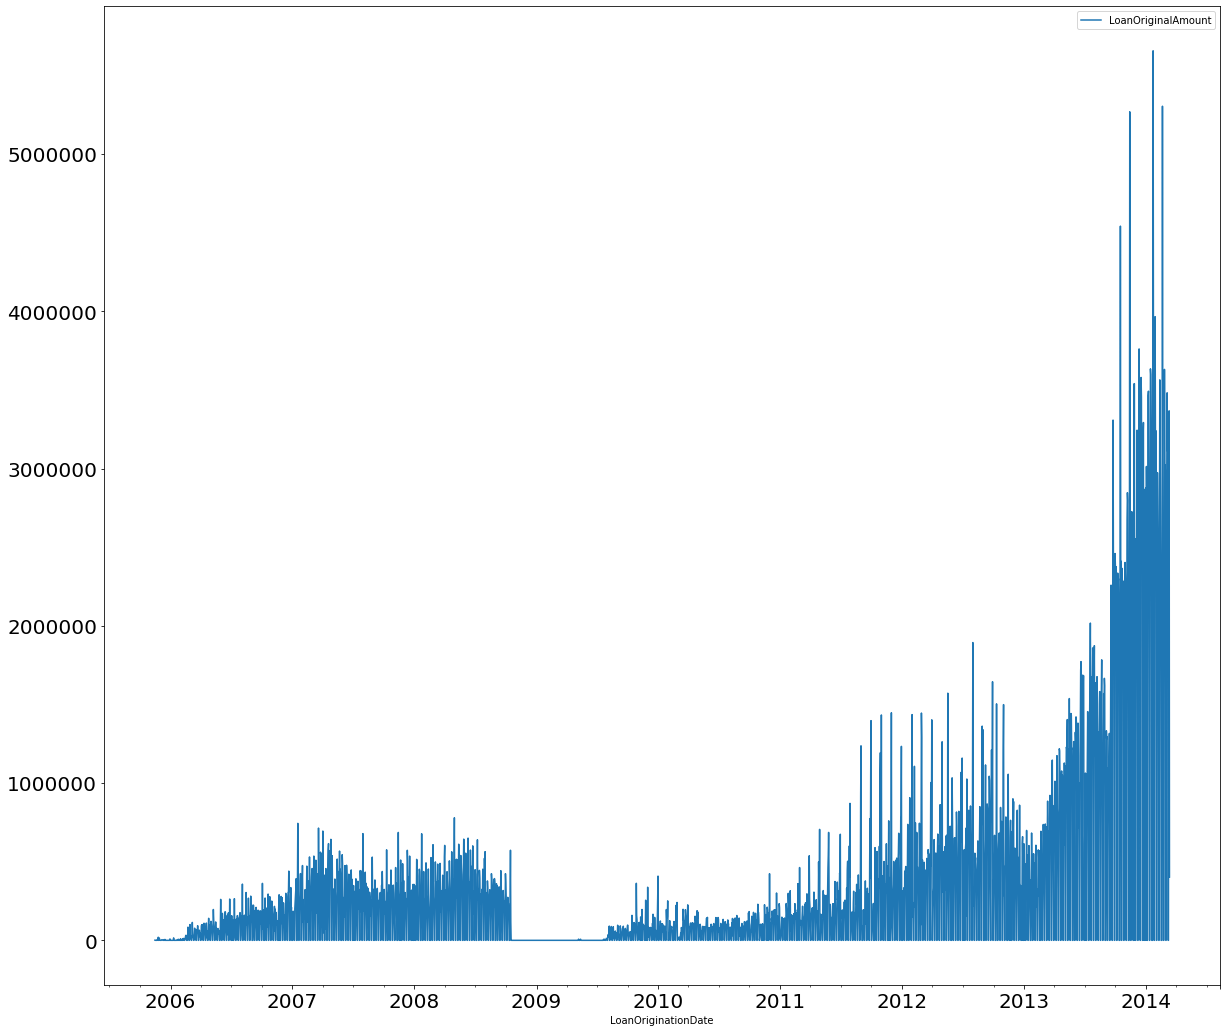

In [123]:
# sb.lineplot(x='LoanOriginationDate', y='LoanOriginalAmount', data=loan_origin_timeseries,
#                    kind='reg', space=0, height=5, ratio=4)

# sb.tsplot(x="LoanOriginationDate", y="LoanOriginalAmount", data=loan_origin_timeseries)

loan_origin_timeseries.resample('D').sum().plot(figsize=(20, 18), fontsize=20 ) 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [65]:
numeric_vars = ['ProsperScore', 'BorrowerAPR', 'BorrowerRate', 'EstimatedReturn',
                'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'AvailableBankcardCredit', 
               'PercentFunded', 'CurrentDelinquencies']

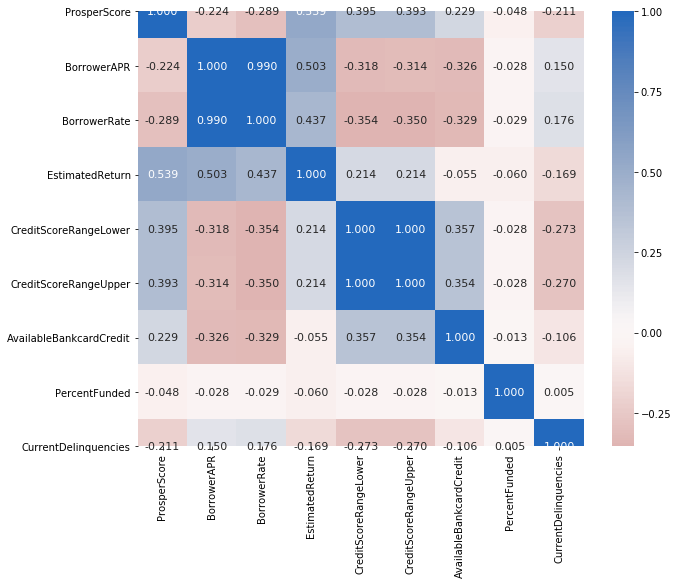

In [83]:
plt.figure(figsize = [10, 8])
sb.heatmap(prosper_clean[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center=0, annot_kws={'size':11})

plt.show()

In [94]:
payments_subset = prosper_clean[['IncomeRange', 'ProsperPaymentsOneMonthPlusLate',
                           'ProsperPaymentsLessThanOneMonthLate']].dropna()

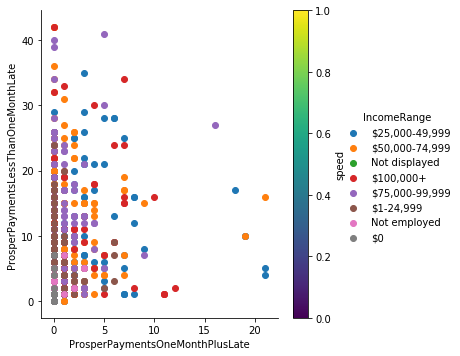

In [95]:
g = sb.FacetGrid(data = payments_subset, hue = 'IncomeRange', height = 5)
g.map(plt.scatter, 'ProsperPaymentsOneMonthPlusLate', 'ProsperPaymentsLessThanOneMonthLate', cmap='viridis_r')
plt.colorbar(label = 'speed')
g.add_legend()

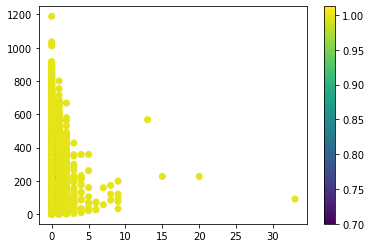

In [76]:
plt.scatter(data = prosper_clean, x = 'InvestmentFromFriendsCount', y = 'Investors', c = 'PercentFunded')
plt.colorbar()

Text(0, 0.5, 'Investors')

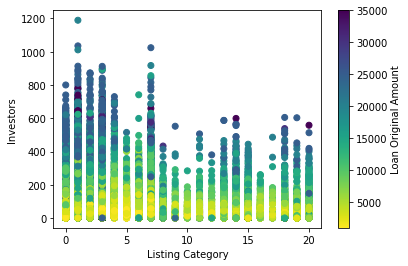

In [78]:
g = plt.scatter(data=prosper_clean, x= 'ListingCategory', y = 'Investors', c='LoanOriginalAmount', cmap='viridis_r')
plt.colorbar(label = 'Loan Original Amount')
plt.xlabel('Listing Category')
plt.ylabel('Investors')

Text(0, 0.5, 'Investors')

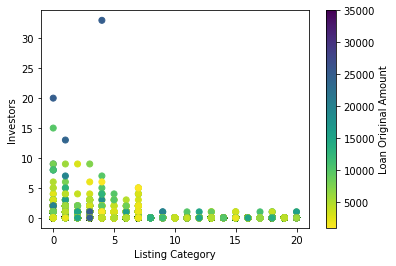

In [81]:
g = plt.scatter(data=prosper_clean, x= 'ListingCategory', y = 'InvestmentFromFriendsCount', c='LoanOriginalAmount', cmap='viridis_r')
plt.colorbar(label = 'Loan Original Amount')
plt.xlabel('Listing Category')
plt.ylabel('Investors')

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

> #### Citations:
1. https://stackoverflow.com/questions/29803093/check-which-columns-in-dataframe-are-categorical?noredirect=1&lq=1
2. https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
3. https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib
4. https://www.standardandpoors.com/en_US/web/guest/article/-/view/sourceId/504352

5. Understing Rate and APR; The interest rate is the cost of borrowing the principal loan amount. ... The APR is a broader measure of the cost of a mortgage because it includes the interest rate plus other costs such as broker fees, discount points and some closing costs, expressed as a percentage